In [145]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib, time

In [234]:
def timer(func, *args):
    t1 = time.time()
    func(*args)
    return time.time() - t1

def mean(n):
    return np.sum(n) / n.shape[0]
def std(n, ddof=0):
    return np.sqrt((1/(n.shape[0]-ddof) * np.sum((n-mean(n))**2)))
def norm(n):
    return (n - mean(n)) / std(n)
def corr(x, y):
    return np.sum(norm(x)*norm(y))/x.shape[0]

def solver(A, b):
    assert A.shape[0] == b.shape[0], f"Shapes do not match with {A.shape[0], b.shape[0]}"
    A = A.copy()
    b = b.copy()
    for i in range(A.shape[0]):
        val = 1/A[i,i]
        A[i] = A[i] * val
        b[i] = b[i] * val
        for j in range(A.shape[0]):
            if i == j:
                continue
            b[j] = b[j] - (b[i] * A[j,i])
            A[j] = A[j] - (A[i] * A[j,i])
    return b

def plot(y_test, pred):
    plt.figure(figsize=(12, 6))
    plt.plot(y_test, label="Real")
    plt.plot(pred, label="Pred")
    plt.legend(loc=1)
    plt.show()

In [147]:
class OLS:
    """
        Ordinary least squares Linear Regression using statistics.
    """
    def fit(self, x, y):
        "Fit linear model."
        self.x_mean = np.mean(x)
        self.y_mean = np.mean(y)
        
        self.x_std = np.std(x)
        self.y_std = np.std(y)
        
        self.r = np.corrcoef(x, y)[0,1]
        
    def predict(self, x):
        "Predict using the linear model."
        if not isinstance(x, np.ndarray):
            x = np.array(x)
        m = self.r * self.y_std / self.x_std
        b = self.y_mean - m * self.x_mean
        return m*x + b

In [148]:
x = np.random.rand(20)
y = (3 * x + 1.5).reshape(-1)

x_test = np.array(list(range(1, 25))).reshape(-1)
y_test = x_test * 3 + 1.5

In [149]:
a = OLS()
a.fit(x, y)
pred = a.predict(x_test)

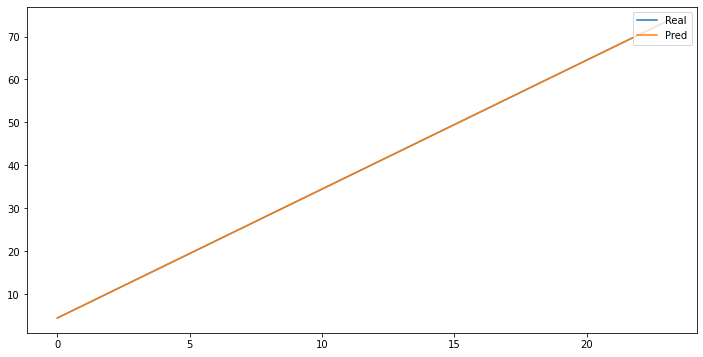

In [150]:
plot(y_test, pred)

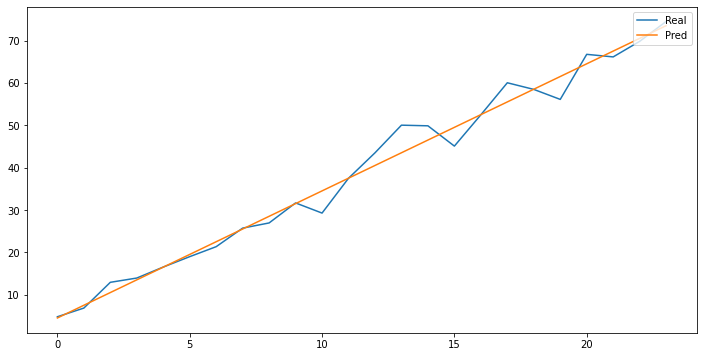

In [211]:
# Adding a little bit of noise
y_test_noisy = y_test*(1+np.random.normal(0, 0.1, size=(y_test.shape[0])))
plot(y_test_noisy, pred)

In [212]:
class LinearRegression:     
    def fit(self, x, y):
        A = np.insert(x, 0, 1, axis=1)
        Ax = np.dot(A.T, A)
        b = np.dot(A.T, y)
        self.w = np.linalg.solve(Ax, b)
        
    def predict(self, x):
        x = np.insert(x, 0, 1, axis=1)
        return np.dot(x, self.w)

In [213]:
x = np.random.rand(20, 2)
y = (3 * x[:,0] + x[:,1] + 1.5)

x_test = np.random.rand(10, 2)
y_test = (3 * x_test[:,0] + x_test[:,1] + 1.5)

In [214]:
l = LinearRegression()
l.fit(x, y)
pred = l.predict(x_test)

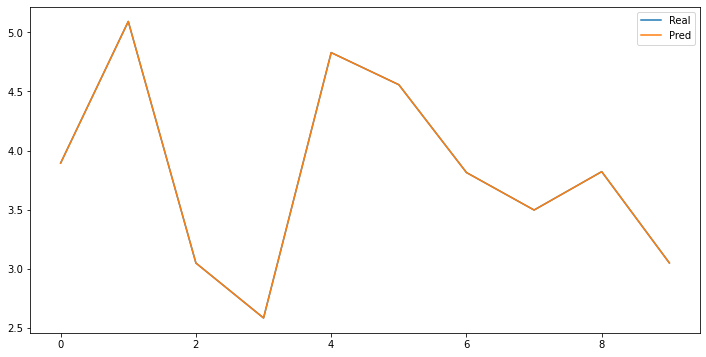

In [216]:
plot(y_test, pred)

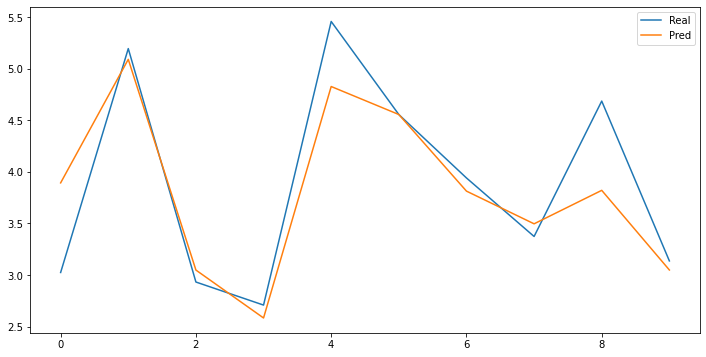

In [217]:
# Adding a little bit of noise
y_test_noisy = y_test*(1+np.random.normal(0, 0.1, size=(y_test.shape[0])))
plot(y_test_noisy, pred)

In [228]:
x = np.random.rand(20, 8)
y = (3 * x[:,:2] + 1.5)

x_test = np.random.rand(10, 8)
y_test = (3 * x_test[:,:2] + 1.5)

In [229]:
l = LinearRegression()
l.fit(x, y)
pred = l.predict(x_test)

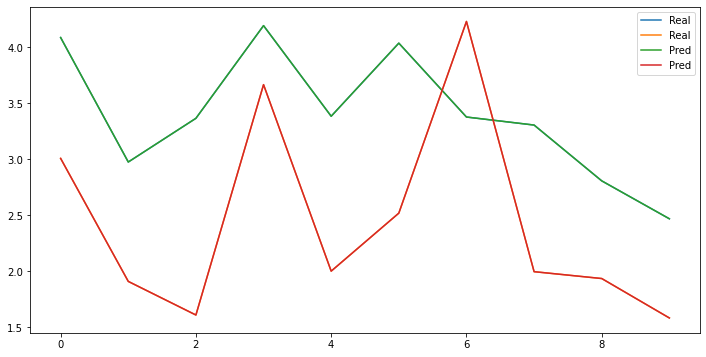

In [230]:
plot(y_test, pred)

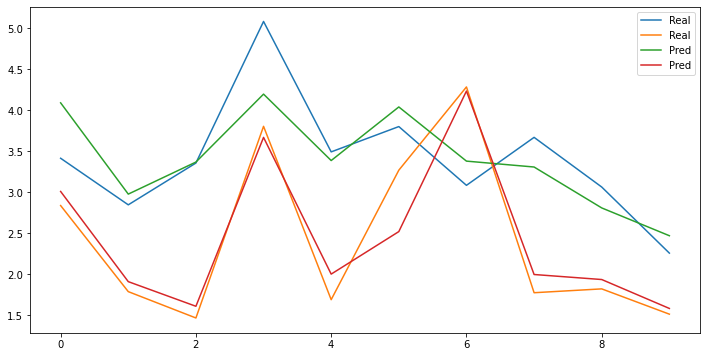

In [233]:
# Adding a little bit of noise
y_test_noisy = y_test*(1+np.random.normal(0, 0.12, size=(y_test.shape[0], y_test.shape[1])))
plot(y_test_noisy, pred)